In [119]:
print(__doc__)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy  
from scipy import linalg

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale  
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import itertools

from sklearn import mixture


style.use("ggplot")
%matplotlib inline



Automatically created module for IPython interactive environment


In [120]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [174]:
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data1_Car/car.csv')
#convert buying to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['buying'] = raw_data.buying.str.replace('vhigh','0')
raw_data['buying'] = raw_data.buying.str.replace('high','1')
raw_data['buying'] = raw_data.buying.str.replace('med','2')
raw_data['buying'] = raw_data.buying.str.replace('low','3')
data=raw_data
data['buying']=raw_data.buying
data['buying']=data.buying.astype(int)

#convert maint to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['maint'] = raw_data.maint.str.replace('vhigh','0')
raw_data['maint'] = raw_data.maint.str.replace('high','1')
raw_data['maint'] = raw_data.maint.str.replace('med','2')
raw_data['maint'] = raw_data.maint.str.replace('low','3')
data['maint']=raw_data.maint
data['maint']=data.maint.astype(int)

#convert doors, 5more ->5, all to int
raw_data['doors'] = raw_data.doors.str.replace('5more','5')
data['doors']=raw_data.doors
data['doors']=data.doors.astype(int)

#persons more->5, all to int
raw_data['persons'] = raw_data.persons.str.replace('more','5')
data['persons']=raw_data.persons
data['persons']=data.persons.astype(int)

#lug_boot, small->0, med->1, big->2, all to int
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('small','0')
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('med','1')
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('big','2')
data['lug_boot']=raw_data.lug_boot
data['lug_boot']=data.lug_boot.astype(int)

#safety, low->0, med->1, high->2
raw_data['safety'] = raw_data.safety.str.replace('low','0')
raw_data['safety'] = raw_data.safety.str.replace('med','1')
raw_data['safety'] = raw_data.safety.str.replace('high','2')
data['safety']=raw_data.safety
data['safety']=data.safety.astype(int)

#set label column
data['acceptable_label'] = raw_data.acceptable

#acceptable, unacc->0, acc->1, good->2, vgood->3
raw_data['acceptable'] = raw_data.acceptable.str.replace('unacc','0')
raw_data['acceptable'] = raw_data.acceptable.str.replace('acc','1')
raw_data['acceptable'] = raw_data.acceptable.str.replace('good','2')
raw_data['acceptable'] = raw_data.acceptable.str.replace('v2','3')
data['acceptable']=raw_data.acceptable
data['acceptable']=data.acceptable.astype(int)
data.to_csv('data1.csv' , sep=',')
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable,acceptable_label
0,0,0,2,2,0,0,0,unacc
1,0,0,2,2,0,1,0,unacc
2,0,0,2,2,0,2,0,unacc
3,0,0,2,2,1,0,0,unacc
4,0,0,2,2,1,1,0,unacc


In [122]:
datalist_label = data.acceptable
datalist_names = data.acceptable_label
datalist_label_names = np.array(['unacc','acc','good','vgood'])
datalist = data.drop(['acceptable','acceptable_label'], axis=1)
datalist_array = datalist.values
datalist_array

array([[0, 0, 2, 2, 0, 0],
       [0, 0, 2, 2, 0, 1],
       [0, 0, 2, 2, 0, 2],
       ..., 
       [3, 3, 5, 5, 2, 0],
       [3, 3, 5, 5, 2, 1],
       [3, 3, 5, 5, 2, 2]])

In [123]:
EM_data = data.drop(['buying','maint','doors','persons','lug_boot','safety'], axis=1)

In [124]:
#NN  on X = datalist_array, y = datalist_label
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import StratifiedKFold
import time
from sklearn.neural_network import MLPClassifier

skf = StratifiedKFold(datalist_label, n_folds=4)
# Only take the first fold.
train_index, test_index = next(iter(skf))


X_train = datalist_array[train_index]
y_train = datalist_label[train_index].values
X_test  = datalist_array[test_index]
y_test  = datalist_label[test_index].values

In [125]:
#NN of original data
from sklearn.metrics import explained_variance_score

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 1.03892006
Iteration 2, loss = 0.89786322
Iteration 3, loss = 0.79470831
Iteration 4, loss = 0.71031073
Iteration 5, loss = 0.62745243
Iteration 6, loss = 0.54439144
Iteration 7, loss = 0.48296494
Iteration 8, loss = 0.58045382
Iteration 9, loss = 0.43215406
Iteration 10, loss = 0.38388783
Iteration 11, loss = 0.37821896
Iteration 12, loss = 0.35503610
Iteration 13, loss = 0.32861726
Iteration 14, loss = 0.33212186
Iteration 15, loss = 0.29675447
Iteration 16, loss = 0.32086875
Iteration 17, loss = 0.31344747
Iteration 18, loss = 0.25959806
Iteration 19, loss = 0.24989952
Iteration 20, loss = 0.22852860
Iteration 21, loss = 0.25068690
Iteration 22, loss = 0.27276938
Iteration 23, loss = 0.21855874
Iteration 24, loss = 0.25588710
Iteration 25, loss = 0.18866410
Iteration 26, loss = 0.22647718
Iteration 27, loss = 0.17266470
Iteration 28, loss = 0.17820107
Iteration 29, loss = 0.16677432
Iteration 30, loss = 0.16125560
Iteration 31, loss = 0.15943472
Iteration 32, los

In [126]:
from sklearn.decomposition import PCA
def pca_code(data):
    pca = PCA()
    X_transformed = pca.fit_transform(data)
    # We center the data and compute the sample covariance matrix.
    X_centered = data - np.mean(data, axis=0)
    cov_matrix = np.dot(X_centered.T, X_centered) / len(data)
    eigenvalues = pca.explained_variance_
    e_v=[]
    for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
        e_v.append(eigenvalue)
    return e_v

In [127]:
eig_val = pca_code(datalist_array)
eig_val

[1.5564562825709307,
 1.2507237984945025,
 1.2507237984944994,
 1.2507237984944986,
 0.66705269253039989,
 0.66705269253039945]

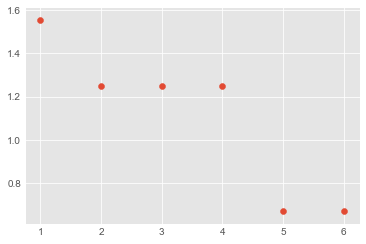

In [128]:
x_axis=[1,2,3,4,5,6]
plt.scatter(x_axis, eig_val)

In [129]:
#comment the below change to plot the original X################
pca = decomposition.PCA(n_components=3)
pca.fit(datalist_array)
data_PCA = pca.transform(datalist_array)
data_PCA
#Here new X is the new arrays of datalist after PCA treatment, 
#can be used to evaluate with K-means and EM algorithms, not necessary to plot
##################################
#Original data
#X = datalist_array
#X

array([[ 1.66666667,  2.1209698 ,  0.03856309],
       [ 1.66666667,  2.1209698 ,  0.03856309],
       [ 1.66666667,  2.1209698 ,  0.03856309],
       ..., 
       [-1.33333333, -2.1209698 , -0.03856309],
       [-1.33333333, -2.1209698 , -0.03856309],
       [-1.33333333, -2.1209698 , -0.03856309]])

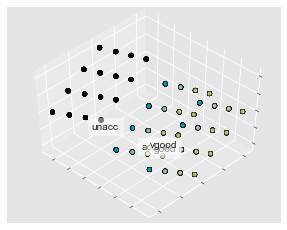

In [130]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
datalist_label_3D = data.acceptable.values

plt.cla()

for name, label in [('unacc', 0), ('acc', 1), ('good', 2), ('vgood', 3)]:
    ax.text3D(data_PCA[datalist_label == label, 0].mean(),
              data_PCA[datalist_label == label, 1].mean() + 1.5,
              data_PCA[datalist_label == label, 2].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
datalist_label_3D = np.choose(datalist_label_3D, [0, 1, 2, 3]).astype(np.float)
ax.scatter(data_PCA[:, 0], data_PCA[:, 1], data_PCA[:, 2], c=datalist_label_3D, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [131]:
pca = decomposition.PCA(n_components=2)
pca.fit(datalist_array)
data_PCA = pca.transform(datalist_array)
data_PCA


array([[ 1.66666667, -2.1       ],
       [ 1.66666667, -2.1       ],
       [ 1.66666667, -2.1       ],
       ..., 
       [-1.33333333,  2.1       ],
       [-1.33333333,  2.1       ],
       [-1.33333333,  2.1       ]])

In [132]:
#NN upon PCA dataset
X_train = data_PCA[train_index]
y_train = datalist_label[train_index]
X_test  = data_PCA[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 1.35319582
Iteration 2, loss = 0.75516549
Iteration 3, loss = 0.69954737
Iteration 4, loss = 0.67712317
Iteration 5, loss = 0.66140939
Iteration 6, loss = 0.65724221
Iteration 7, loss = 0.65437344
Iteration 8, loss = 0.65261623
Iteration 9, loss = 0.65135994
Iteration 10, loss = 0.65027632
Iteration 11, loss = 0.65055463
Iteration 12, loss = 0.65032577
Iteration 13, loss = 0.64914783
Iteration 14, loss = 0.64961785
Iteration 15, loss = 0.64883446
Iteration 16, loss = 0.64849441
Iteration 17, loss = 0.64862286
Iteration 18, loss = 0.64849461
Iteration 19, loss = 0.64795054
Iteration 20, loss = 0.64799064
Iteration 21, loss = 0.64803710
Iteration 22, loss = 0.64787433
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.700927
Training variance:  0.0
Test set score: 0.698157
Testing variance:  0.0
Running Time:  0.1500089168548584


In [133]:
n_classes=4
len(train_index)

1294

In [134]:
# EM Try GMMs with K=4
new_component=4
cv_type='spherical'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_PCA)
datalist_pred = gmm.predict(data_PCA)

EM_data['K4_PCA_label']=datalist_pred
K4_PCA_label = datalist_pred
EM_PCA4_prob = gmm.predict_proba(data_PCA)

In [135]:
tb1 = pd.crosstab(EM_data['acceptable_label'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3
acceptable_label,,,,
acc,199,0,79,106
good,34,0,5,30
unacc,312,576,198,124
vgood,31,0,6,28


In [136]:
#EM assign test K=4 label
def em_K1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(4))
    if tb1.iloc[0,alpha] == label_max:
        return 'acc'
    if tb1.iloc[1,alpha] == label_max:
        return 'good'
    if tb1.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb1.iloc[3,alpha] == label_max:
        return 'vgood'
EM_data['K4_PCA_label_name']=EM_data['K4_PCA_label'].apply(em_K1_label)
EM_data.head()

,acceptable,acceptable_label,K4_PCA_label,K4_PCA_label_name
0,0,unacc,1,unacc
1,0,unacc,1,unacc
2,0,unacc,1,unacc
3,0,unacc,1,unacc
4,0,unacc,1,unacc


In [137]:
K4_PCA_accuracy = len(EM_data[EM_data['acceptable_label']==EM_data['K4_PCA_label_name']])/len(EM_data)
print('K=4 PCA EM -> {0:.4f}%'.format(K4_PCA_accuracy*100))

K=4 PCA EM -> 70.0231%


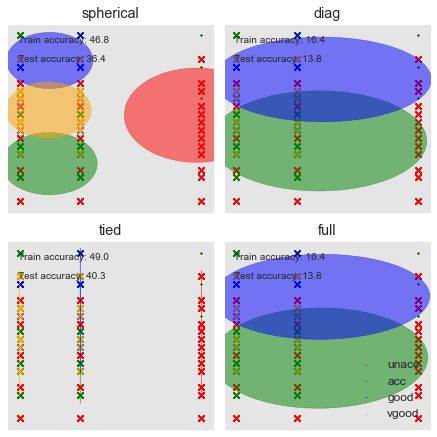

In [138]:
# Try GMMs using different types of covariances. K=4, iteration=200
X_train = data_PCA[train_index]
y_train = datalist_label[train_index]
X_test  = data_PCA[test_index]
y_test  = datalist_label[test_index]
colors= ['red', 'green', 'blue', 'orange']
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=200, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)
for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = data_PCA[K4_PCA_label == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=datalist_label_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

In [139]:
# EM K=14, spherical
new_component=14
cv_type='spherical'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_PCA)
datalist_pred = gmm.predict(data_PCA)

EM_data['K14_PCA_label']=datalist_pred
K14_PCA_label = datalist_pred
EM_PCA14_prob = gmm.predict_proba(data_PCA)

In [140]:
tb1 = pd.crosstab(EM_data['acceptable_label'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
acceptable_label,,,,,,,,,,,,,,
acc,53,59,0,51,0,0,34,78,39,0,25,0,37,8
good,15,3,0,9,0,0,2,18,15,0,0,0,7,0
unacc,62,114,144,74,108,108,68,108,42,108,82,108,56,28
vgood,14,4,0,10,0,0,4,12,12,0,1,0,8,0


In [141]:
#EM: assign test K=14 label

EM_data['K14_PCA_label_name']=EM_data['K14_PCA_label'].apply(em_K1_label)
EM_data.head()

,acceptable,acceptable_label,K4_PCA_label,K4_PCA_label_name,K14_PCA_label,K14_PCA_label_name
0,0,unacc,1,unacc,11,unacc
1,0,unacc,1,unacc,11,unacc
2,0,unacc,1,unacc,11,unacc
3,0,unacc,1,unacc,11,unacc
4,0,unacc,1,unacc,11,unacc


In [142]:
K14_PCA_accuracy = len(EM_data[EM_data['acceptable_label']==EM_data['K14_PCA_label_name']])/len(EM_data)
print('K=14 PCA EM -> {0:.4f}%'.format(K14_PCA_accuracy*100))

K=14 PCA EM -> 70.0231%


In [143]:
#K-means
data_PCA_df = pd.DataFrame(data=data_PCA[0:,0:],
                   columns=['PCA1','PCA2'])
data_PCA_df['acceptable'] = datalist_label
data_PCA_df['acceptable_label'] = datalist_names
data_PCA_df.head()

,PCA1,PCA2,acceptable,acceptable_label
0,1.666667,-2.1,0,unacc
1,1.666667,-2.1,0,unacc
2,1.666667,-2.1,0,unacc
3,1.666667,-2.1,0,unacc
4,1.666667,-2.1,0,unacc


In [173]:
#EM treated for NN
#choose EM_PCA4_prob and K14_PCA_label 

data_PCA_EM_NN_df = pd.DataFrame(data=data_PCA[0:,0:],
                   columns=['PCA1','PCA2'])
data_PCA_EM_NN_df['PCA14_label'] = EM_data['K14_PCA_label']
data_PCA_EM_NN=data_PCA_EM_NN_df.values
data_PCA_EM_NN_df.to_csv('data_PCA_EM.csv',  sep=',')


In [145]:
#NN upon PCA EM K=14 dataset
X_train = data_PCA_EM_NN[train_index]
y_train = datalist_label[train_index]
X_test  = data_PCA_EM_NN[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 1.35131539
Iteration 2, loss = 0.85693930
Iteration 3, loss = 0.82872789
Iteration 4, loss = 0.74654278
Iteration 5, loss = 0.70916783
Iteration 6, loss = 0.69136157
Iteration 7, loss = 0.67861400
Iteration 8, loss = 0.67830889
Iteration 9, loss = 0.66912407
Iteration 10, loss = 0.66424873
Iteration 11, loss = 0.66274613
Iteration 12, loss = 0.65899079
Iteration 13, loss = 0.65834701
Iteration 14, loss = 0.65725729
Iteration 15, loss = 0.65501191
Iteration 16, loss = 0.65605075
Iteration 17, loss = 0.65420840
Iteration 18, loss = 0.65381341
Iteration 19, loss = 0.65409511
Iteration 20, loss = 0.65297429
Iteration 21, loss = 0.65176008
Iteration 22, loss = 0.65277827
Iteration 23, loss = 0.65502769
Iteration 24, loss = 0.65241260
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.700927
Training variance:  0.0
Test set score: 0.698157
Testing variance:  0.0
Running Time:  0.12100696563720703


In [146]:
data_PCA_df.describe()

,PCA1,PCA2,acceptable
count,1.728000e+03,1.728000e+03,1728.000000
mean,-1.579241e-16,2.544261e-16,0.414931
std,1.247580e+00,1.118358e+00,0.740700
min,-1.333333e+00,-2.100000e+00,0.000000
25%,-1.333333e+00,-7.500000e-01,0.000000
50%,-3.333333e-01,2.914335e-16,0.000000
75%,1.666667e+00,7.500000e-01,1.000000
max,1.666667e+00,2.100000e+00,3.000000


In [147]:
data_PCA_df.pivot_table(index='acceptable_label', values=['PCA1','PCA2'],aggfunc=np.mean)

,PCA1,PCA2
acceptable_label,,
acc,-0.817708,0.123437
good,-0.811594,0.752174
unacc,0.352617,-0.116198
vgood,-0.871795,0.635385


In [148]:
d_corr_PCA1=data_PCA_df.iloc[:,[0,1,2]].corr()
d_corr_PCA1
#acceptable related to safety most, for features only lug_boot related to persons

,PCA1,PCA2,acceptable
PCA1,1.000000e+00,4.605693e-16,-0.373459
PCA2,4.605693e-16,1.000000e+00,0.192298
acceptable,-3.734592e-01,1.922982e-01,1.000000


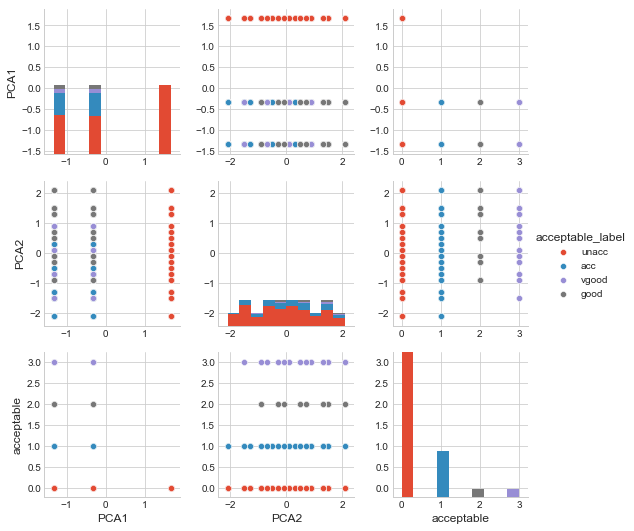

In [149]:
sns.set_style('whitegrid')
sns.pairplot(data_PCA_df.iloc[:,[0,1,2,3]], hue='acceptable_label')
plt.show()

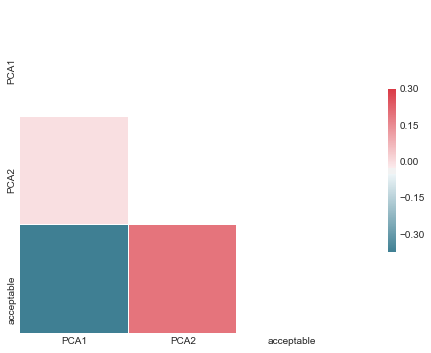

In [150]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr_PCA1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr_PCA1,mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

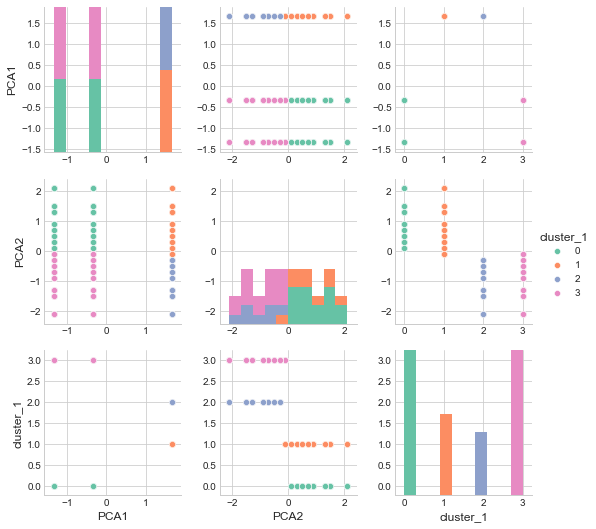

In [151]:
#K=4 K-means
kmeans_model_1 = KMeans(n_clusters=4,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data_PCA_df.iloc[:,0:2])
labels_1 = kmeans_model_1.labels_
data_PCA_df['cluster_1']=labels_1
with sns.color_palette("Set2", 10):
    sns.pairplot(data_PCA_df.iloc[:,[0,1,4]], hue='cluster_1')

In [152]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data_PCA_df['acceptable_label'],labels_1)
tb1

col_0,0,1,2,3
acceptable_label,,,,
acc,208,0,0,176
good,48,0,0,21
unacc,274,324,252,360
vgood,46,0,0,19


In [153]:
#PCA cluster_1_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(4))
    if tb1.iloc[0,alpha] == label_max:
        return 'acc'
    if tb1.iloc[1,alpha] == label_max:
        return 'good'
    if tb1.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb1.iloc[3,alpha] == label_max:
        return 'vgood'
data_PCA_df['cluster_1_label']=data_PCA_df['cluster_1'].apply(cluster_1_label)
data_PCA_df.head()

,PCA1,PCA2,acceptable,acceptable_label,cluster_1,cluster_1_label
0,1.666667,-2.1,0,unacc,2,unacc
1,1.666667,-2.1,0,unacc,2,unacc
2,1.666667,-2.1,0,unacc,2,unacc
3,1.666667,-2.1,0,unacc,2,unacc
4,1.666667,-2.1,0,unacc,2,unacc


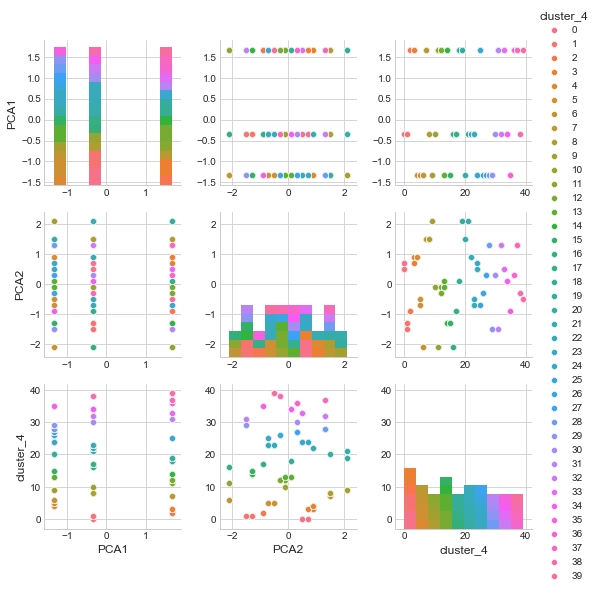

In [154]:
#K=40
kmeans_model_4 = KMeans(n_clusters=40,random_state=123)
distances_4 = kmeans_model_4.fit_transform(data_PCA_df.iloc[:,0:2])
labels_4 = kmeans_model_4.labels_
data_PCA_df['cluster_4']=labels_4
with sns.color_palette("Set2", 10):
    sns.pairplot(data_PCA_df.iloc[:,[0,1,6]], hue='cluster_4')

In [155]:
data_PCA_df.head()

,PCA1,PCA2,acceptable,acceptable_label,cluster_1,cluster_1_label,cluster_4
0,1.666667,-2.1,0,unacc,2,unacc,11
1,1.666667,-2.1,0,unacc,2,unacc,11
2,1.666667,-2.1,0,unacc,2,unacc,11
3,1.666667,-2.1,0,unacc,2,unacc,11
4,1.666667,-2.1,0,unacc,2,unacc,11


In [156]:
#compare labels K=40
tb1 = pd.crosstab(data_PCA_df['acceptable_label'],labels_4)
tb1

col_0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
acceptable_label,,,,,,,,,,,,,,,,,,,,,
acc,27,21,0,0,14,24,6,0,15,12,...,10,0,12,0,14,10,0,0,12,0
good,9,0,0,0,0,0,0,0,3,6,...,0,0,6,0,0,2,0,0,6,0
unacc,30,50,36,72,20,46,30,36,14,14,...,26,36,14,36,20,22,36,36,16,36
vgood,6,1,0,0,2,2,0,0,4,4,...,0,0,4,0,2,2,0,0,2,0


In [157]:
data_PCA_df['cluster_4_label']=data_PCA_df['cluster_4'].apply(cluster_1_label)


In [158]:
#find center of K-means=4
centroids_PCA1 = kmeans_model_1.cluster_centers_
print (centroids_PCA1)

[[-0.83333333  0.925     ]
 [ 1.66666667  0.81111111]
 [ 1.66666667 -1.04285714]
 [-0.83333333 -0.925     ]]


In [159]:
#find center of K-means=40
centroids_PCA4 = kmeans_model_4.cluster_centers_

In [160]:
data_PCA_df.head()

,PCA1,PCA2,acceptable,acceptable_label,cluster_1,cluster_1_label,cluster_4,cluster_4_label
0,1.666667,-2.1,0,unacc,2,unacc,11,unacc
1,1.666667,-2.1,0,unacc,2,unacc,11,unacc
2,1.666667,-2.1,0,unacc,2,unacc,11,unacc
3,1.666667,-2.1,0,unacc,2,unacc,11,unacc
4,1.666667,-2.1,0,unacc,2,unacc,11,unacc


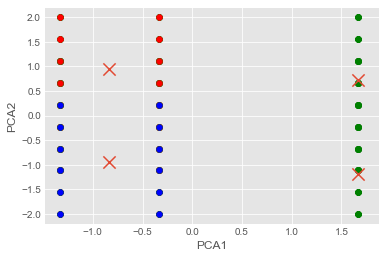

In [51]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ["g.", "r.", "b.", "y"]
for i in range(len(data_PCA_df)):
    plt.plot(data_PCA_df.iloc[i,0],data_PCA_df.iloc[i,1], colors[data_PCA_df.iloc[i,2]], markersize = 10)    
plt.scatter(centroids_PCA1[:,0], centroids_PCA1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


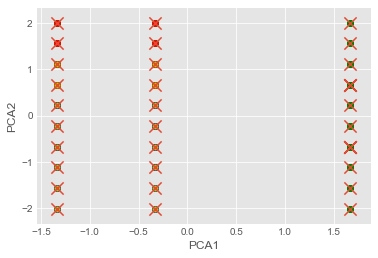

In [52]:
style.use("ggplot")
colors = ["g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w."]
for i in range(len(data_PCA_df)):
    plt.plot(data_PCA_df.iloc[i,0],data_PCA_df.iloc[i,1], colors[data_PCA_df.iloc[i,2]], markersize = 10)    
plt.scatter(centroids_PCA4[:,0], centroids_PCA4[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [161]:
d_corr_PCA2=data_PCA_df.iloc[:,[0,1,4]].corr()
d_corr_PCA2
#lug_boot and persons

,PCA1,PCA2,cluster_1
PCA1,1.000000e+00,4.605693e-16,-0.022128
PCA2,4.605693e-16,1.000000e+00,-0.765716
cluster_1,-2.212779e-02,-7.657159e-01,1.000000


In [162]:
cluster_1_accuracy = len(data_PCA_df[data_PCA_df['acceptable_label']==data_PCA_df['cluster_1_label']])/len(data_PCA_df)
cluster_4_accuracy = len(data_PCA_df[data_PCA_df['acceptable_label']==data_PCA_df['cluster_4_label']])/len(data_PCA_df)
print('K=4 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))
print('K=40 KMeans -> {0:.4f}%'.format(cluster_4_accuracy*100))

K=4 KMeans -> 70.0231%
K=40 KMeans -> 70.1389%


In [172]:
#K-Means treated for NN
#choose PCA and K40_PCA_label 

data_PCA_KM_NN_df = pd.DataFrame(data=data_PCA[0:,0:],
                   columns=['PCA1','PCA2'])
data_PCA_KM_NN_df['PCA_40_label'] = data_PCA_df['cluster_4']
data_PCA_KM_NN=data_PCA_KM_NN_df.values
data_PCA_KM_NN_df.to_csv('data_PCA_KM.csv' , sep=',')
data_PCA_NN_df=pd.DataFrame(data=data_PCA[0:,0:],
                   columns=['PCA1','PCA2'])
data_PCA_NN_df['acceptable'] = data_PCA_df['acceptable']
data_PCA_NN_df.to_csv('data_PCA_NN.csv' , sep=',')



In [164]:
#NN upon PCA K-means K=14 dataset
X_train = data_PCA_KM_NN[train_index]
y_train = datalist_label[train_index]
X_test  = data_PCA_KM_NN[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 2.78362959
Iteration 2, loss = 0.96467223
Iteration 3, loss = 0.92538647
Iteration 4, loss = 1.08636468
Iteration 5, loss = 0.96324502
Iteration 6, loss = 0.89163631
Iteration 7, loss = 0.86519549
Iteration 8, loss = 0.85220705
Iteration 9, loss = 0.84456753
Iteration 10, loss = 0.83907983
Iteration 11, loss = 0.83691715
Iteration 12, loss = 0.83548898
Iteration 13, loss = 0.83469628
Iteration 14, loss = 0.83412265
Iteration 15, loss = 0.83379561
Iteration 16, loss = 0.83358050
Iteration 17, loss = 0.83348693
Iteration 18, loss = 0.83335247
Iteration 19, loss = 0.83346265
Iteration 20, loss = 0.83330561
Iteration 21, loss = 0.83325685
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.700927
Training variance:  0.0
Test set score: 0.698157
Testing variance:  0.0
Running Time:  0.10500597953796387
